# FINM8006 Advanced Investment 
## Market Efficiency and Predictbility
---
Qiaoqiao Zhu   
Australian National University

In [2]:
from __future__ import division
from __future__ import print_function
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_datareader.data as web
import datetime

from IPython.display import Image
#pd.options.display.float_format = '{:,.2f}'.format

## Market Efficiency

What can potentially be wrong with the following statements?
* the market declined temporarily because of profit-taking. It should bounce back next week.
* Buy stocks of strong companies, with good earnings and good earnings growth. They will be more profitable and give better returns to stockholders.
* The stock price rises slowly as new information diffuses through the market.

$$
\begin{align} R_{i,t+1}=E_{t}(R_{i,t+1}|I_{t})+\epsilon_{i,t+1}  \qquad &\text{rational expectation}  \\
 E_{t}(R_{t+1})=f(x_{t+1})  \qquad &\text{model}
\end{align}
$$

Market efficiency implies "fully and correctly reveals all available information in determining security prices."

$$ \underbrace{E(R_{i,t+1}-E_{t}(R_{i,t+1}|I_{t}))}_{\text{Abnormal Return}}=E(\epsilon_{i,t+1})=0 $$

### Joint Hypothesis Issue

Above equations imply
* In order to define abnormal return, we have to define "normal" return first (i.e. model).
* Market efficiency is a joint hypothesis: Market is information efficient and our model is correct

perfect efficiency is unrealistic given frictions in the market. The question is whether deviations from EMH exceed reasonable transaction cost.

Assume $E(R)=\mu$ is constant. Then 
$$ \begin{align*}  R_{t}&=a+bR_{t-1}+\epsilon_{t}   \\
 b&=0 \end{align*} $$
Prices move on news of cashflow (dividend).

### evidence on daily data

In [3]:
df = web.DataReader('^GSPC', 'yahoo',start=datetime.datetime(1963, 1, 1), end=datetime.datetime(2015, 12, 30))
df['ret'] = df['Adj Close'].pct_change()
df.head()

Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
1962-12-31  62.959999  63.430000  62.680000  63.099998  63.099998  5420000   
1963-01-02  63.099998  63.389999  62.320000  62.689999  62.689999  2540000   
1963-01-03  62.689999  63.889999  62.669998  63.720001  63.720001  4570000   
1963-01-04  63.720001  64.449997  63.570000  64.129997  64.129997  5400000   
1963-01-07  64.129997  64.589996  63.669998  64.120003  64.120003  4440000   

                 ret  
Date                  
1962-12-31       NaN  
1963-01-02 -0.006498  
1963-01-03  0.016430  
1963-01-04  0.006434  
1963-01-07 -0.000156

In [4]:
df['lagret'] = df['ret'].shift()
print(smf.ols('ret ~ lagret', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.932
Date:                Wed, 27 Sep 2017   Prob (F-statistic):             0.0264
Time:                        14:09:12   Log-Likelihood:                 42289.
No. Observations:               13340   AIC:                        -8.457e+04
Df Residuals:                   13338   BIC:                        -8.456e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003    8.8e-05      3.497      0.0

although t-statistics is significant, R-sqaured is extremely low. Extremely unlikely to have consistent result using lag daily return for prediction. 

### Evidence on annual data

In [5]:
df2 = df[['Adj Close']]
df2 = df2.asfreq('A', method='pad')
df2['ret'] = df2['Adj Close'].pct_change()
df2 = df2.dropna()
df2.head()

Adj Close       ret
Date                           
1963-12-31  75.019997  0.188906
1964-12-31  84.750000  0.129699
1965-12-31  92.430000  0.090619
1966-12-31  80.330002 -0.130910
1967-12-31  96.470001  0.200921

In [6]:
df2['lagret'] = df2['ret'].shift()
print(smf.ols('ret ~ lagret', data=df2).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                  0.002114
Date:                Wed, 27 Sep 2017   Prob (F-statistic):              0.964
Time:                        14:10:21   Log-Likelihood:                 20.089
No. Observations:                  51   AIC:                            -36.18
Df Residuals:                      49   BIC:                            -32.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0813      0.026      3.117      0.0

* Individual stocks have negative daily autocorrelations, but broader indexes have positive autocorrelations. These effects are small and smaller in recent data.
* Predictability are very week, depend on whether great depression is included, and will not survive reasonable transaction cost.
* No predictability in annual data
* EMH holds up pretty well in U.S. data

### Efficiency is Relative

* Even for the most ardent supporter of EMH, efficiency is relative.
* Absolute efficiency is not possible due to  Grossman and Stiglitz (1980) information paradox.
* But EMH is very important in help us think what should/should not drive market price.

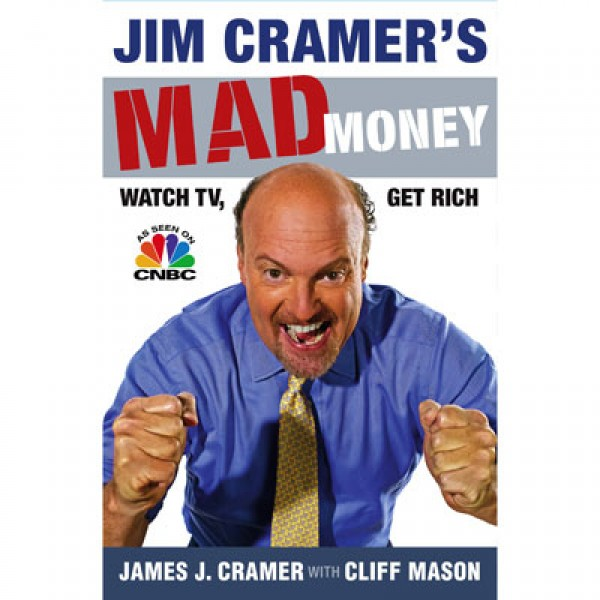

In [7]:
Image('../img/cramer.jpg')

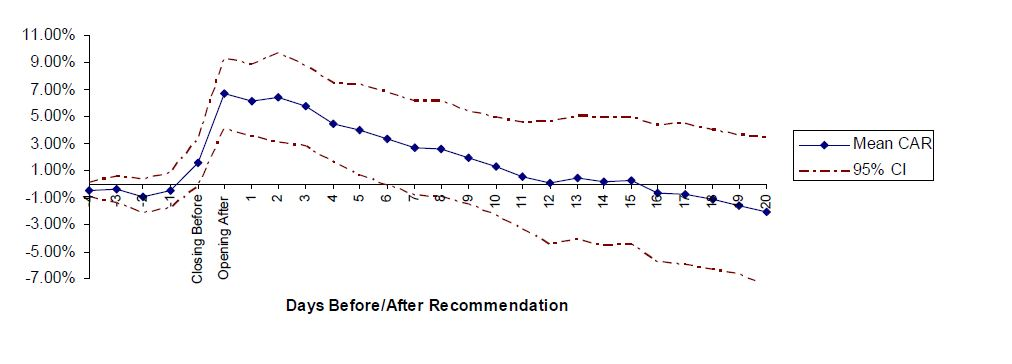

In [8]:
Image('../img/madmoney1.jpg')

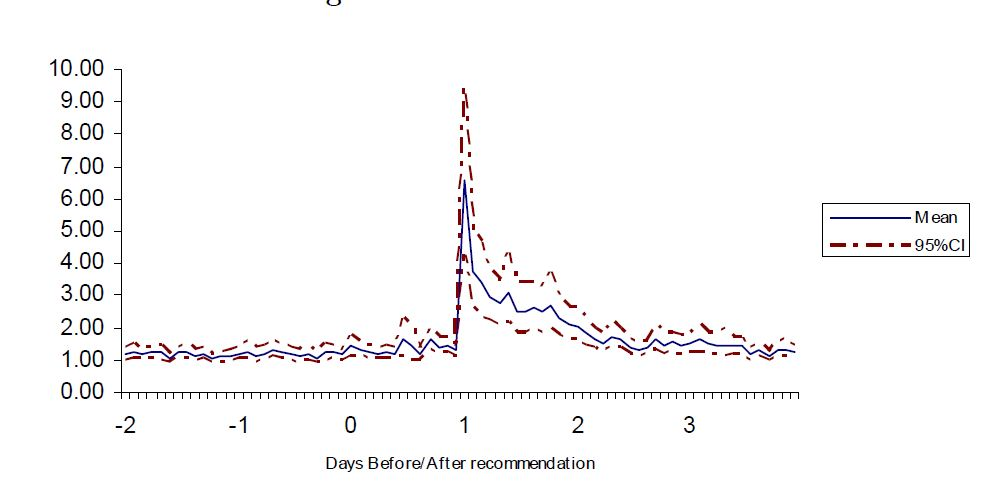

In [9]:
print('Short Interest Outstanding:')
Image('../img/madmoney2.jpg')

### Too good to be true and strategy $R^2$

cosider regression
$$R_{i,t+1} = E_{t}(R_{i,t+1}|I_{t}) + \epsilon_{t+1}$$
where $$ E_{t}(R_{i,t+1}|I_{t}) =\mu(I_{t}) $$ is the model predicted returns.

$$R^{2} = \frac{\sigma^{2}(\mu(I_{t}))}{\sigma^{2}(R_{i,t+1})} = \frac{E(\mu^{2}(I_{t}))}{\sigma^{2}(R_{i,t+1})}.  $$

recall
$$ \frac{\sigma_{m}}{E(m)} >= \max\frac{E(R^{e}_{i})}{\sigma^{e}_{R_{i}}}$$

$$R^{2}<= (\frac{\sigma_{m}}{E(m)})^2$$

In [7]:
0.3264**2

0.10653696000000001

Given annualized SDF volatility is estimated to be about 0.3264 (Ross 2015), any strategy that can generate $R^2$ of about 10% is a violation of market efficiency (or, if you stick with MEH, it's too good to be true).  

## Long-run Predictability

If stock returns include a permanent random walk component and a temporary mean reverse component, then regression of long run returns on it's lag will have negative coefficient. (Fama-French 1988)

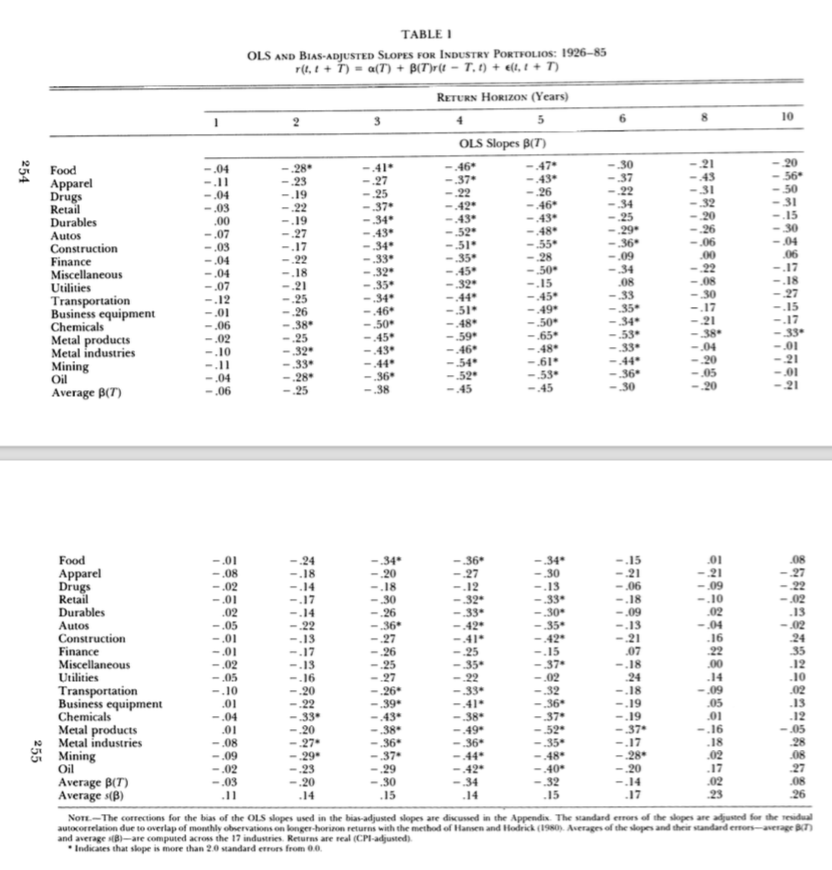

In [10]:
Image('../img/ff88t1.png')

* long run (3-5 years) are negatively correlated
* Prediction coefficient is big (-0.3).

In [8]:
## Example, with recent data
start = datetime.datetime(1927, 1, 1)
end = datetime.datetime(2015, 12, 30)
ds = web.DataReader("12_Industry_Portfolios", "famafrench", start, end)
print(ds['DESCR'])

12 Industry Portfolios
----------------------

This file was created by CMPT_IND_RETS using the 201707 CRSP database. It contains value- and equal-weighted returns for 12 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2017 Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (1068 rows x 12 cols)
  1 : Average Equal Weighted Returns -- Monthly (1068 rows x 12 cols)
  2 : Average Value Weighted Returns -- Annual (89 rows x 12 cols)
  3 : Average Equal Weighted Returns -- Annual (89 rows x 12 cols)
  4 : Number of Firms in Portfolios (1068 rows x 12 cols)
  5 : Average Firm Size (1068 rows x 12 cols)
  6 : Sum of BE / Sum of ME (89 rows x 12 cols)
  7 : Value-Weighted Average of BE/ME (89 rows x 12 cols)


In [9]:
df = pd.DataFrame(ds[2])
df2 = df.resample('3A').apply(lambda x: (1+x/100).prod()-1)['1930':'2014']
df2.columns = df2.columns.str.strip()
df3 = df2.join(df2.shift(), rsuffix='_lag')
df3.head()

NoDur     Durbl     Manuf     Enrgy     Chems     BusEq  \
Date                                                                     
1930-12-31 -0.166372 -0.396256 -0.236369 -0.229224  0.166233  0.088181   
1933-12-31 -0.021249  0.228085 -0.224509  0.099146  0.100426 -0.404015   
1936-12-31  0.619744  1.192739  1.366692  0.802751  1.009987  1.692887   
1939-12-31 -0.024945 -0.094364 -0.210388 -0.286188  0.055123 -0.211381   
1942-12-31 -0.078209  0.036389 -0.072891  0.246372 -0.084161 -0.035249   

               Telcm     Utils     Shops      Hlth    ...      Manuf_lag  \
Date                                                  ...                  
1930-12-31  0.309360  0.446411 -0.405420 -0.059855    ...            NaN   
1933-12-31 -0.224004 -0.573132 -0.022491 -0.241722    ...      -0.236369   
1936-12-31  1.041095  0.720260  0.995423  0.701215    ...      -0.224509   
1939-12-31  0.083059 -0.120933 -0.062779  0.202121    ...       1.366692   
1942-12-31 -0.091144 -0.349670 -0.061860 -0.109693    ...      -0.210388   

            Enrgy_lag  Chems_lag  BusEq_lag  Telcm_lag  Utils_lag  Shops_lag  \
Date                                                                           
1930-12-31        NaN        NaN        NaN        NaN        NaN        NaN   
1933-12-31  -0.229224   0.166233   0.088181   0.309360   0.446411  -0.405420   
1936-12-31   0.099146   0.100426  -0.404015  -0.224004  -0.573132  -0.022491   
1939-12-31   0.802751   1.009987   1.692887   1.041095   0.720260   0.995423   
1942-12-31  -0.286188   0.055123  -0.211381   0.083059  -0.120933  -0.062779   

            Hlth_lag  Money_lag  Other_lag  
Date                                        
1930-12-31       NaN        NaN        NaN  
1933-12-31 -0.059855  -0.433337  -0.201801  
1936-12-31 -0.241722  -0.329367  -0.410220  
1939-12-31  0.701215   1.451024   0.691417  
1942-12-31  0.202121  -0.309656  -0.310599  

[5 rows x 24 columns]

In [10]:
print(smf.ols('Manuf ~ Manuf_lag', data=df3[:'2016']).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Manuf   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     2.930
Date:                Wed, 27 Sep 2017   Prob (F-statistic):             0.0988
Time:                        14:12:33   Log-Likelihood:                -14.920
No. Observations:                  28   AIC:                             33.84
Df Residuals:                      26   BIC:                             36.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5470      0.107      5.092      0.0

long run returns are predictable, but how do we explain this predictability?

#### Dividend Ratio

We often are given the data of value-weighted return index with dividend (vwretd) and without dividend (vwretx), how do we find $\frac{D}{P}$ and $\frac{D_{t}}{D_{t-1}}$? 

Notice the definition $$ vwretd_{t}=\frac{P_{t}+D_{t}}{P_{t-1}}-1 \qquad
 vwretx_{t}=\frac{P_{t}}{P_{t-1}}-1 $$, Therefore

* $$ \frac{vwretd_{t}+1}{vwretx_{t}+1}-1 =\frac{P_{t}+D_{t}}{P_{t-1}}\frac{P_{t-1}}{P_{t}}-1=\frac{D_{t}}{P_{t}} $$
* $$ \frac{D_{t}}{D_{t-1}} =\frac{D_{t}}{P_{t}}/\frac{D_{t-1}}{P_{t-1}}*\frac{P_{t}}{P_{t-1}}=\frac{(D/P)_{t}}{(D/P)_{t-1}}(vwretx_{t}+1) $$

In [3]:
msi = pd.read_csv('../datalib/msi_annual.csv')
msi.head(3)

year   yvwretd   yvwretx
0  1926  0.089656  0.035449
1  1927  0.331989  0.270444
2  1928  0.388476  0.334938

In [4]:
dp = msi[['year', 'yvwretd', 'yvwretx']]
dp['dp'] = (dp.yvwretd+1)/(dp.yvwretx+1)-1
dp['lagdp'] = dp['dp'].shift()
dp['dd'] = (dp['dp']/dp['lagdp'])*(dp['yvwretx']+1)
dp.head(3)

year   yvwretd   yvwretx        dp     lagdp        dd
0  1926  0.089656  0.035449  0.052350       NaN       NaN
1  1927  0.331989  0.270444  0.048444  0.052350  1.175638
2  1928  0.388476  0.334938  0.040106  0.048444  1.105174

plotting DP ratio. DP is persistent and stationary. 

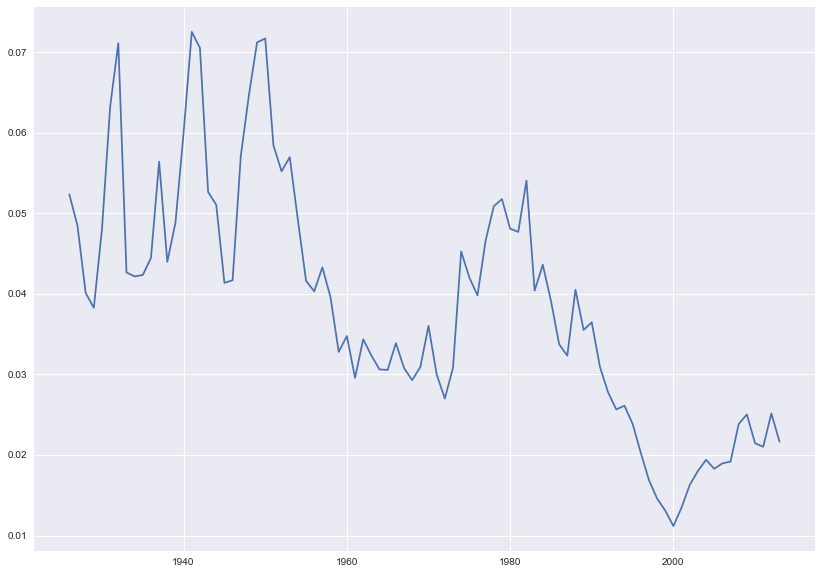

In [13]:
plt.rc('figure', figsize=(14, 10))
fig, ax = plt.subplots()
plt.plot(dp.year, dp.dp, label=pd)
plt.show()

### Regressing dp on lag of dp, and dividend growth on lag dp. 

In [14]:
print(smf.ols('dp ~ lagdp', data=dp).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     dp   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     347.6
Date:                Wed, 27 Sep 2017   Prob (F-statistic):           8.92e-32
Time:                        14:13:41   Log-Likelihood:                 312.72
No. Observations:                  87   AIC:                            -621.4
Df Residuals:                      85   BIC:                            -616.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0036      0.002      1.786      0.0

In [15]:
print(smf.ols('dd ~ lagdp', data=dp).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     dd   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                   0.02759
Date:                Wed, 27 Sep 2017   Prob (F-statistic):              0.868
Time:                        14:13:43   Log-Likelihood:                 40.545
No. Observations:                  87   AIC:                            -77.09
Df Residuals:                      85   BIC:                            -72.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0645      0.046     23.264      0.0

In [8]:
print(smf.ols('yvwretd ~ np.log(lagdp)', data=dp).fit().summary())
#print(smf.ols('yvwretd ~ lagdp', data=dp).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                yvwretd   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     4.231
Date:                Tue, 03 Oct 2017   Prob (F-statistic):             0.0428
Time:                        16:56:43   Log-Likelihood:                 17.254
No. Observations:                  87   AIC:                            -30.51
Df Residuals:                      85   BIC:                            -25.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4641      0.170      2.737

Alternatively, we can use Robert Shiller's data. 

In [18]:
shiller = pd.read_csv('../datalib/shiller.csv')
shiller['dp'] = shiller['D']/shiller['P']
shiller['lagdp']=shiller['dp'].shift()
shiller.head()

year      P     D     E     R    Return        dp     lagdp
0  1927  13.40  0.77  1.11  4.26  0.381460  0.057463       NaN
1  1928  17.53  0.85  1.38  4.64  0.483782  0.048488  0.057463
2  1929  24.86  0.97  1.61  6.01 -0.087691  0.039019  0.048488
3  1930  21.71  0.98  0.97  4.15 -0.159834  0.045140  0.039019
4  1931  15.98  0.82  0.61  2.43 -0.365431  0.051314  0.045140

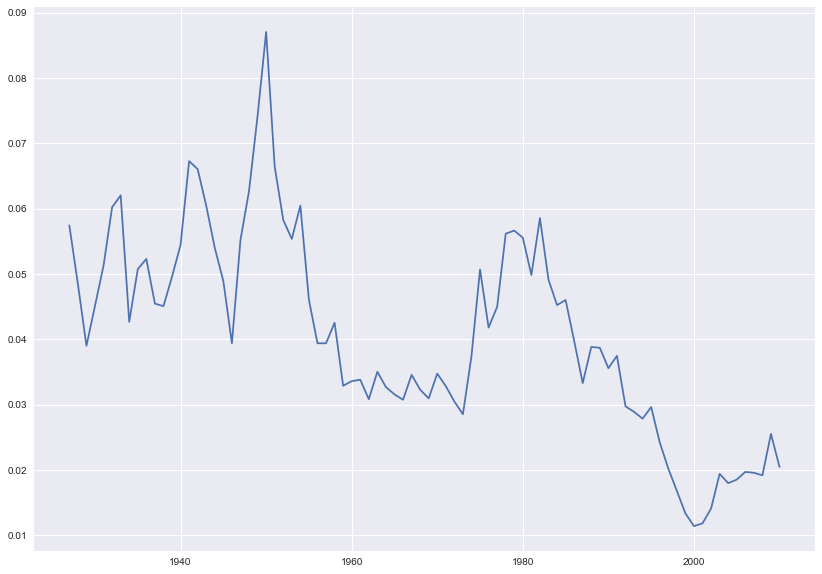

In [19]:
plt.rc('figure', figsize=(14, 10))
fig, ax = plt.subplots()
plt.plot(shiller.year, shiller.dp, label=pd)
plt.show()

In [20]:
print(smf.ols('dp ~ lagdp', data=shiller).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     dp   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     365.2
Date:                Wed, 27 Sep 2017   Prob (F-statistic):           9.45e-32
Time:                        14:14:13   Log-Likelihood:                 298.54
No. Observations:                  83   AIC:                            -593.1
Df Residuals:                      81   BIC:                            -588.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0033      0.002      1.605      0.1

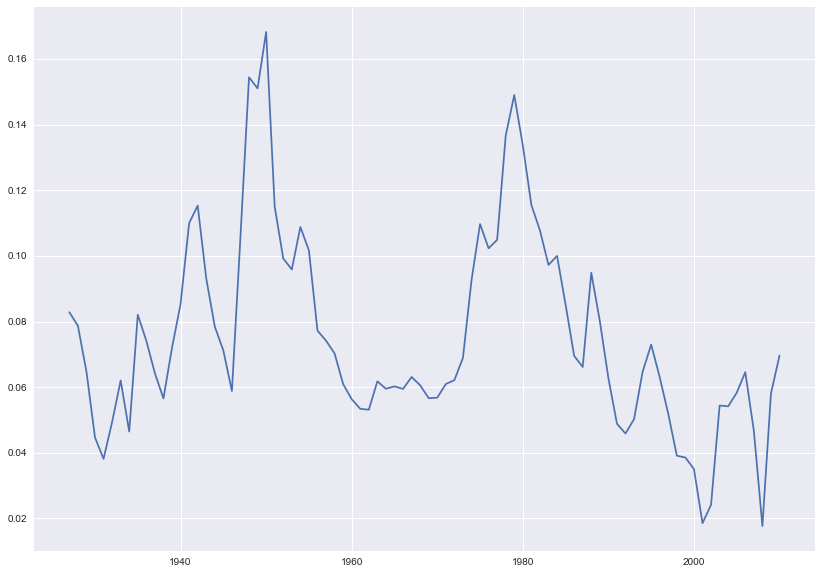

In [21]:
shiller['ep'] = shiller['E']/shiller['P']
plt.rc('figure', figsize=(14, 10))
fig, ax = plt.subplots()
plt.plot(shiller.year, shiller.ep, label=pd)
plt.show()

#### Long-run DP Regression

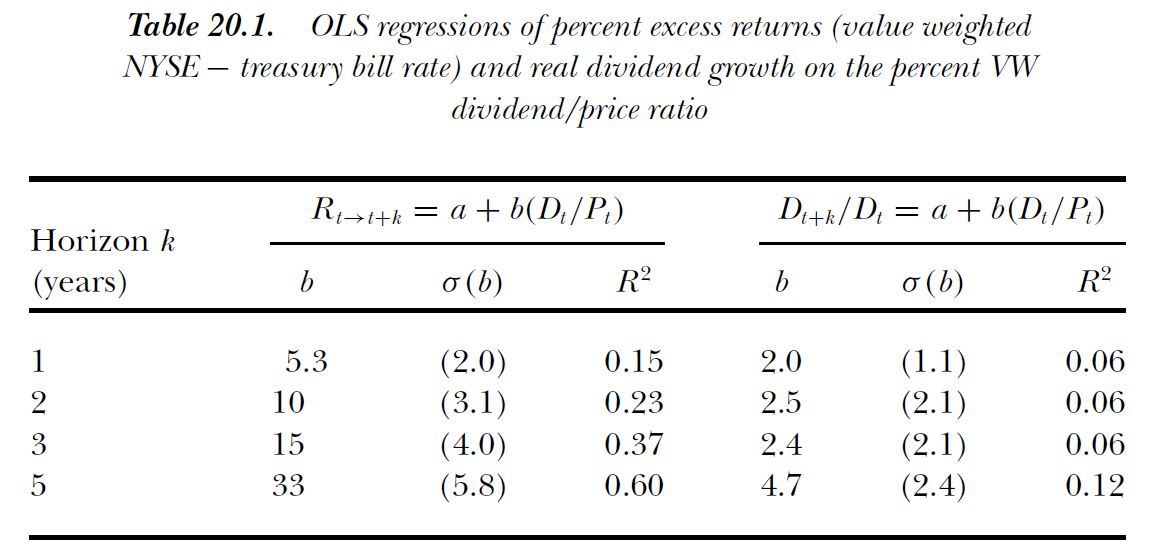

In [22]:
Image('../img/table20_1.jpg')

* High D/P (low P) leads to high return
* $R^{2}$ and predictability increase with years 1-5.
* D/P cannot predict dividend growth as well, indicating that it's the price (R) that's predicted.

#### D/P Iteration

The simple return on a stock is given by
$1+R_{t+1}= \frac{P_{t+1}+D_{t+1}}{P_{t}}$. If expected return is constant, $E_{t}R_{t+1}=R$, then
$$P_{t}=E_{t} \frac{P_{t+1}+D_{t+1}}{1+R} $$


Iterating forward for K periods, we get
$$ P_{t}=E_{t} [\sum_{k=1}^{K}(\frac{1}{1+R})^{k} D_{t+k}]+ E_{t}[(\frac{1}{1+R})^{K} P_{t+K}]  $$
Stock price is all discounted dividend and discounted end value. If $K\rightarrow \infty$ then
$$ P_{t}=E_{t} [\sum_{k=1}^{\infty}(\frac{1}{1+R})^{k} D_{t+k}] \quad \text{(dividend discount model)} $$

#### with time-varying discount rates
Let's start by taking log of the identity
$1+R_{t+1}= \frac{P_{t+1}+D_{t+1}}{P_{t}}$. We have
$$ \begin{align*}r_{t+1} &= log(P_{t+1}+D_{t+1})-log(P_{t})= log(P_{t+1}(1+\frac{D_{t+1}}{P_{t+1}}))-log(P_{t}) \\
&=p_{t+1}-p_{t}+log(1+e^{(d_{t+1}-p_{t+1})})\end{align*} $$

where lower case letters represent log value. We can then take a linear approximation around constant $D/P$ at this point (see appendix) and get
$$ r_{t+1}=\kappa+\rho p_{t+1}+(1-\rho)d_{t+1}-p_{t} $$ where $\rho=1/(1+D/P)\approx 1-D/P=0.96 $, since average dividend yield is about 4%, and $\kappa$ is a constant.

#### Campbell-Siller Model
Let's ignore the constant term and solving $p_{t}$ forward, imposing $\lim_{j\rightarrow\infty}\rho^{j}p_{t+j}=0$, we get
$$\begin{align*}p_{t} &= E_{t}\sum_{j=0}^{\infty}\rho^{j}[(1-\rho)d_{t+1+j}-r_{t+1+j}]  \\
&=p_{CF, t}-p_{DR, t}\end{align*} $$ 
Price is driven by cash flow (dividend) expectations and discount rate (return) expectations. 
The log dividend-price ratio is
$$d_{t}-p_{t} = E_{t}\sum_{j=1}^{\infty}\rho^{j-1}[-\Delta d_{t+j}+r_{t+j}] $$
d/p can move if and only if there is news about either current dividends, future
dividend growth or future returns.

If we run regression of $d_{t}-p_{t}$ on $\Delta d_{t+j}$ and $r_{t+j}$ of the long-run, the coefficients should sum up to one, and the relative magnitude of the coefficients should give us indication of the importance of dividend vs discount rate. 

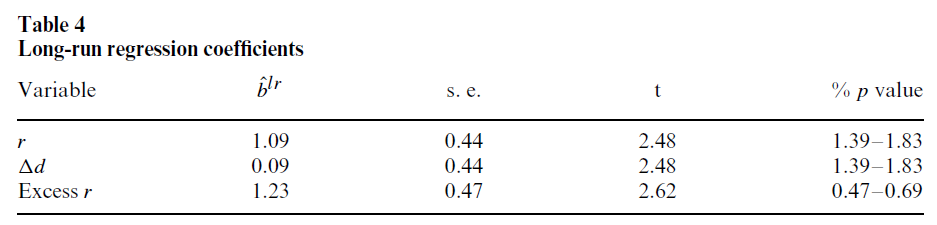

In [23]:
Image('../img/longrun_vd.png')

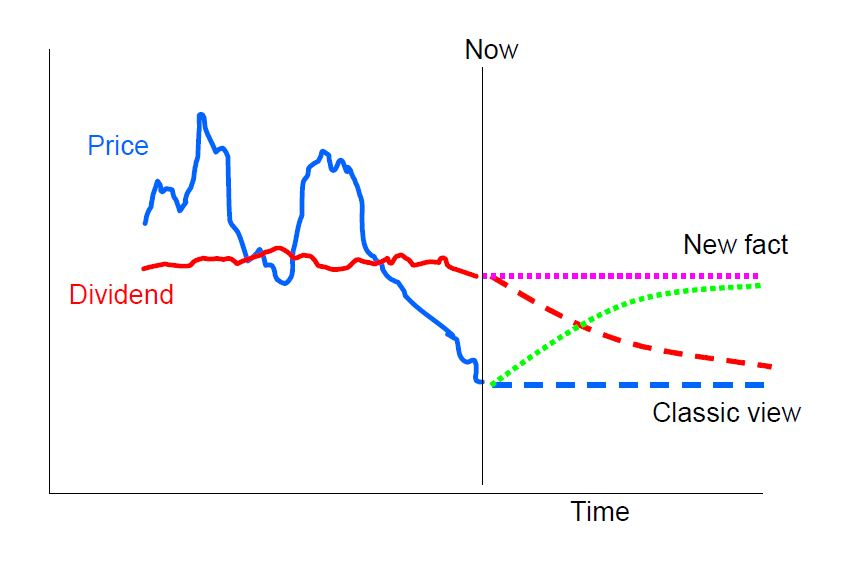

In [24]:
Image('../img/newview.jpg')

#### Practicality and implications
*  return news, discount rate news, risk premium news drives markets, not cash flow news.
*  Many more variables predict return: E/P, B/M etc.
*  It also implies market volatility is driven mostly not by cash flow news, therefore "excessive".
*  Why wouldn't people trade on it, what's the equilibrium implication? Price is low because people traded on it. Expected return is e.g. high but required to be high (e.g. depression). $1=E(mR)$ still hold. Predictability says $cov(m,R)$ is important.
* Predictability doesn't necessary mean market is inefficient. It means risk premium is recession-related, slow time varying. Unconditional CAPM with constant $\lambda$ does not hold!

#### Alternative sentiment explanation
$$
\begin{align}
        p_{t}&=p^{*}+s_{t}\\
        s_{t}&=\rho s_{t-1}+u_{t}
\end{align}
$$

where $p^{*}$ is fundamental value and $s_{t}$ is a small mean-reverting sentiment, and $u_{t}$ is random error. Sentiment is slow-moving ($\rho\rightarrow 1$).  On short horizon, $p_{t} - p_{t-1}=s_{t}-s_{t-1}=(\rho-1)s_{t-1}+u_{t}\approx u_{t}$ is almost random walk. On long horizon, $E_{t}p_{t+k}=p^{*}+\rho^{k}s_{t}$,$ \rho^{k}\approx 0 $, you have mean reversion. It's a case of joint hypothesis.

### Appendix

#### Campbell-Shiller Approximation

Taylor approximation has 
$$f(x)=f(x_{0})+f'(x_{0})(x-x_{0})  $$
here $f(x) = log(1+exp(x)) $ and $f'(x) = exp(x)/(1+exp(x))$, $x_{0}=\overline{d-p}$. So

$$f(x)=log(1+e^{\overline{d-p}})+\frac{e^{\overline{d-p}}}{1+e^{\overline{d-p}}}(d_{t+1}-p_{t+1}-(\overline{d-p}))$$

$$
\begin{align*} r_{t+1}&=p_{t+1}-p_{t}+f(x)\\&=log(1+e^{\overline{d-p}})+\frac{1}{1+e^{\overline{d-p}}}p_{t+1}+\frac{e^{\overline{d-p}}}{1+e^{\overline{d-p}}}d_{t+1}-p_{t}\\
&=\kappa+\rho p_{t+1}+(1-\rho)d_{t+1}-p_{t} \end{align*} $$
